<h1> ________________________________________________________________________________________ </h1>
<h1>Project 3C MATH1042 - Peluang dan Statistika</h1>


<b style="font-size:16px;">Anggota Kelompok:</b>

<ul>
    <li>Darren Nathaniel Rusly - 10101190104 - <a href="https://github.com/DarrenRusly">Git</a></li>
    <li>Felicia Yolanda - 10102190618 - <a href="https://github.com/feliciagrace23">Git</a></li>
    <li>Gracheilla A. S - 10103190598 - <a href="https://github.com/GracheillaAngel">Git</a></li>
    <li>Rivaldo Linogi - 10101190177 - <a href="https://github.com/rivaldopieter">Git</a></li>
    <li>Victor Chendra - 10101200338 - <a href="https://github.com/victorchendra02">Git</a></li>
</ul>
<h1> ___________________________________________________________________________________________ </h1>

In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import statistics
from scipy.stats import t
from scipy.stats import f

In [2]:
# Data Asli .CSV (Mentah)

dataset = pd.read_csv("income.csv")
dataset.head()

,Age,Marital status,Address,Income,Income Category,Car price,Car price category,Education,Emply,Retired,...,Caller ID,Call waiting,Own TV,Own VCR,Own CD player,Own PDA,Own computer,Own Fax,Read newspapers,Response
0,55,1,12,72.0,3.0,37.0,3.0,1,23,0,...,1,0,1,1,1,0,0,0,0,1
1,56,0,29,153.0,4.0,76.0,3.0,1,35,0,...,1,1,1,1,1,0,0,0,0,0
2,28,1,9,28.0,2.0,13.9,1.0,3,4,0,...,0,0,1,1,1,0,0,0,1,1
3,24,1,4,26.0,2.0,13.0,1.0,4,0,0,...,0,1,1,1,1,0,1,0,1,1
4,25,1,2,23.0,1.0,11.3,1.0,2,5,0,...,1,0,1,1,0,0,1,0,1,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6400 non-null   int64  
 1   Marital status               6400 non-null   int64  
 2   Address                      6400 non-null   int64  
 3   Income                       6400 non-null   float64
 4   Income Category              6400 non-null   float64
 5   Car price                    6400 non-null   float64
 6   Car price category           6400 non-null   float64
 7   Education                    6400 non-null   int64  
 8   Emply                        6400 non-null   int64  
 9   Retired                      6400 non-null   int64  
 10  Employment category          6400 non-null   int64  
 11  Gender                       6400 non-null   object 
 12  Length at current residence  6400 non-null   int64  
 13  Wireless          

In [4]:
# Mengambil kolom "Age" & "Income" saja

dataset_filtered = dataset.iloc[:,[0, 3]]
dataset_filtered.head()

,Age,Income
0,55,72.0
1,56,153.0
2,28,28.0
3,24,26.0
4,25,23.0


In [5]:
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     6400 non-null   int64  
 1   Income  6400 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 100.1 KB


<h1> ________________________________________________________________________________________ </h1>
<h1>Tugas Pemograman</h1>
<h4>1. Rata-Rata dan Standar Deviasi Sampel Income dari setiap kategori.</h4> 
<p> Dipisahkan menjadi 3 kategori : </p>
<ol>
<li> Umur <strong> kurang </strong> dari 35 tahun. </li>
<li> Umur <strong> lebih dari sama dengan </strong> 35 tahun dan <strong> kurang dari sama dengan </strong> 50 tahun.</li>
<li> Umur <strong> lebih <strong> dari 50 tahun. </li>
</ol>

<h4> 2. Lakukan Uji Hipotesa untuk masing-masing kelompok, Ujilah apakah rata-rata ketiga kelompok tersebut memiliki pendapatan diatas 35k USD. </h4>
<h4> 3. Buatlah visualisasi data untuk hasil uji hipotesis.</h4>

<h3> 1. Rata-Rata dan Standar Deviasi setiap kelompok. </h3>

In [6]:
# Variabel "Age" Untuk Masing-Masing Kategori
dataset_1 = dataset_filtered[dataset_filtered['Age'] < 35]
dataset_2 = dataset_filtered[(dataset_filtered['Age']>= 35) & (dataset_filtered['Age'] <= 50)]
dataset_3 = dataset_filtered[dataset_filtered['Age'] > 50]

# Sizenya masing2
print("SIZE")
print("Kategori 1:  ", dataset_1.size) 
print("Kategori 2:  ", dataset_2.size)
print("Kategori 3:  ", dataset_3.size)

SIZE
Kategori 1:   3934
Kategori 2:   5660
Kategori 3:   3206


In [7]:
print("INCOME")

######################### Kategori 1 #########################
dataset_1_mean = (statistics.mean(dataset_1['Income']))    #Variabel
dataset_1_std = (statistics.stdev(dataset_1['Income']))    #Variabel
print("Kategori 1 (usia <35)")
print("Rata-Rata           :", dataset_1_mean, " k USD/year")
print("Standar Deviasi     :", dataset_1_std, "  k USD/year \n")



######################### Kategori 2 #########################
dataset_2_mean = statistics.mean(dataset_2['Income'])    #Variabel
dataset_2_std = statistics.stdev(dataset_2['Income'])    #Variabel
print("Kategori 2 (usia 35-50)")
print("Rata-Rata           :", dataset_2_mean, "  k USD/year")
print("Standar Deviasi     :", dataset_2_std, "  k USD/year \n")



######################### Kategori 3 #########################
dataset_3_mean = statistics.mean(dataset_3['Income'])    #Variabel
dataset_3_std = statistics.stdev(dataset_3['Income'])    #Variabel
print("Kategori 3 (usia 50+)")
print("Rata-Rata           :", dataset_3_mean, "  k USD/year")
print("Standar Deviasi     :", dataset_3_std, " k USD/year")

INCOME
Kategori 1 (usia <35)
Rata-Rata           : 35.492628368073206  k USD/year
Standar Deviasi     : 22.12086059824498   k USD/year 

Kategori 2 (usia 35-50)
Rata-Rata           : 71.10141342756184   k USD/year
Standar Deviasi     : 54.4436493627786   k USD/year 

Kategori 3 (usia 50+)
Rata-Rata           : 109.9475982532751   k USD/year
Standar Deviasi     : 124.10554788219329  k USD/year


<h4>Penghasilan setiap kelompok dalam Rupiah.</h4>

In [8]:
# Informasi Tambahan Doang (USD - IDR = Rp 14367.70)
IDR = 14367.70

print("Kategori 1 (usia <35)")
print("Rata-Rata  : Rp", dataset_1_mean * IDR, "  /year")
print("Std        : Rp", dataset_1_std * IDR, " /year \n")

print("Kategori 2 (usia 35-50)")
print("Rata-Rata  : Rp", dataset_2_mean * IDR, " /year")
print("Std        : Rp", dataset_2_std * IDR, "  /year \n")

print("Kategori 3 (usia 50+)")
print("Rata-Rata  : Rp", dataset_3_mean * IDR, " /year")
print("Std        : Rp", dataset_3_std * IDR, " /year \n")

Kategori 1 (usia <35)
Rata-Rata  : Rp 509947.4366039654   /year
Std        : Rp 317825.88881740446  /year 

Kategori 2 (usia 35-50)
Rata-Rata  : Rp 1021563.7777031802  /year
Std        : Rp 782230.0209495941   /year 

Kategori 3 (usia 50+)
Rata-Rata  : Rp 1579694.1074235807  /year
Std        : Rp 1783111.2803069886  /year 



<h3>2. Uji Hipotesis</h3>

In [9]:
def plot_hypothesis_result(t_value, t_value_test, min_x, max_x, dof):
    x_axis = np.arange(min_x, max_x, 0.001)
    rr = [x for x in x_axis if x <= t_value]

    plt.figure(figsize=(10, 8))
    plt.ylim(-0.015, 0.45)
    plt.plot(x_axis, t.pdf(x_axis, dof), color="k")
    plt.title("T Distribution", fontsize=15)
    plt.plot([min_x, max_x], [0.05, 0.05], "k--")

    plt.fill_between(x_axis[:len(rr)], t.pdf(x_axis, dof)[:len(rr)], color="red")
    plt.fill_between([min_x, t_value], [-0.01, -0.01], color="red")
    plt.annotate("RR", xy=(-6, -0.012), xytext=(-11, 0.15), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([t_value, t_value], [-0.01, 0.05], "k--")
    plt.plot(t_value, 0.05, "ko")
    plt.text(t_value-2.1, 0.05*1.2, f"{t_value}", ha="center", fontsize=14, weight="bold")

    plt.fill_between(x_axis[len(rr):], t.pdf(x_axis, dof)[len(rr):], color="c0")
    plt.fill_between([t_value, max_x], [-0.01, -0.01], color="c0")
    plt.annotate("FRR", xy=(0, 0.1), xytext=(8, 0.3), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([t_value_test, t_value_test], [-0.01, 0.05], "k--")
    plt.plot(t_value_test, 0.05, "ko")
    plt.text(t_value_test+1, 0.05*1.2, f"t = {t_value_test}", ha="center", fontsize=14, weight="bold")

    if t_value < t_value_test:
        plt.text(15, 0.4, "Karena t masuk dalam FRR,", fontsize=14)
        plt.text(15, 0.36, "hipotesis tidak ditolak", fontsize=14)
    else:
        plt.text(15, 0.4, "Karena t masuk dalam RR,", fontsize=14)
        plt.text(15, 0.36, "hipotesis ditolak", fontsize=14)

    plt.show()

<h4> Kelompok 1 </h4>
<h7> Umur dibawah 35 tahun</h7>

In [37]:
from scipy.stats import t

num_sample = dataset_1['Income'].size
h0_mean = 35

dof = num_sample - 1

p = 0.05

t_value = np.round(t.ppf(p, dof), 2)

t_value_test = np.round((dataset_1_mean - h0_mean)/(dataset_1_std/math.sqrt(num_sample)),2)

print("nilai t dengan peluang 0.05 adalah:", t_value)
print("nilai t untuk uji hipotesis rata-rata adalah:", t_value_test)

nilai t dengan peluang 0.05 adalah: -1.65
nilai t untuk uji hipotesis rata-rata adalah: 0.99


<ipython-input-9-a750323baa0e>:18: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between(x_axis[len(rr):], t.pdf(x_axis, dof)[len(rr):], color="c0")
<ipython-input-9-a750323baa0e>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between([t_value, max_x], [-0.01, -0.01], color="c0")


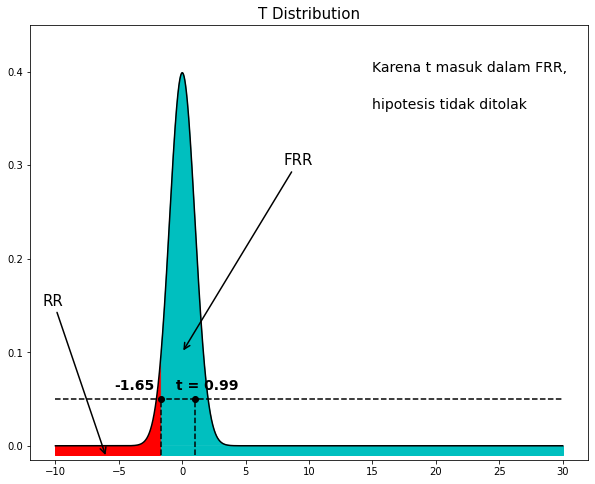

In [11]:
plot_hypothesis_result(t_value, t_value_test, -10, 30, dof)

Karena nilai uji hipotesis t > t(0.05), kita yakin dengan tingkat kepercayaan 95% bahwa nilai rata-rata pendapatan lebih besar dari 35 USD sehingga hipotesis tidak ditolak.

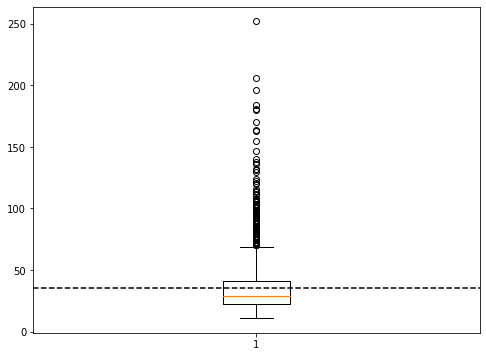

In [12]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset_1['Income'])
left, right = plt.xlim()
plt.plot([left, right], [35, 35], "k--")
plt.show()

<h4> Kelompok 2 </h4>
<h7> Umur 35 tahun s/d 50 tahun</h7>

In [36]:
num_sample = dataset_2['Income'].size
h0_mean = 35

dof = num_sample - 1

p = 0.05

t_value = np.round(t.ppf(p, dof),2)

t_value_test = np.round((dataset_2_mean - h0_mean)/(dataset_2_std/math.sqrt(num_sample)),2)

print("nilai t dengan peluang 0.05 adalah:", t_value)
print("nilai t untuk uji hipotesis rata-rata adalah:", t_value_test)

nilai t dengan peluang 0.05 adalah: -1.65
nilai t untuk uji hipotesis rata-rata adalah: 35.28


/opt/python/envs/default/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5984: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/opt/python/envs/default/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5984: RuntimeWarning: overflow encountered in multiply
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/opt/python/envs/default/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5984: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/opt/python/envs/default/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5984: RuntimeWarning: overflow encountered in multiply
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
<ipython-input-9-a750323baa0e>:18: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_betw

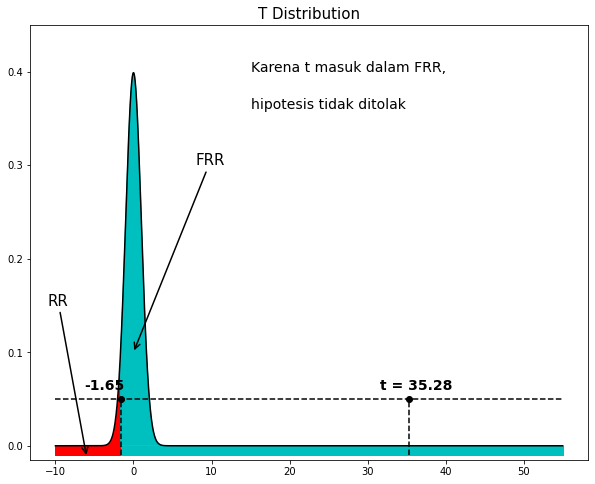

In [14]:
plot_hypothesis_result(t_value, t_value_test, -10, 55, dof)

Karena nilai uji hipotesis t > t(0.05), kita yakin dengan tingkat kepercayaan 95% bahwa nilai rata-rata pendapatan lebih besar dari 35 USD sehingga hipotesis diterima.

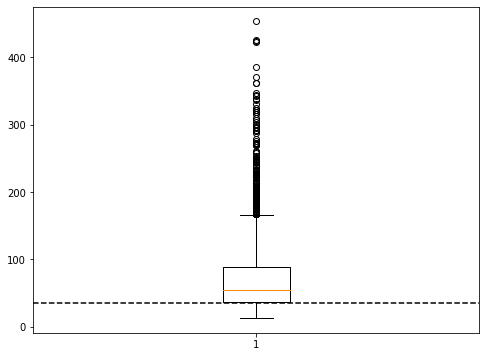

In [15]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset_2['Income'])
left, right = plt.xlim()
plt.plot([left, right], [35, 35], "k--")
plt.show()

<h3> Kelompok 3 </h3>
<h7> Umur diatas 50 tahun</h7>

In [35]:
num_sample = dataset_3['Income'].size
h0_mean = 35

dof = num_sample - 1

p = 0.05

t_value = np.round(t.ppf(p, dof),2)

t_value_test = np.round((dataset_3_mean - h0_mean)/(dataset_3_std/math.sqrt(num_sample)),2)

print("nilai t dengan peluang 0.05 adalah:", t_value)
print("nilai t untuk uji hipotesis rata-rata adalah:", t_value_test)

nilai t dengan peluang 0.05 adalah: -1.65
nilai t untuk uji hipotesis rata-rata adalah: 24.18


<ipython-input-9-a750323baa0e>:18: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between(x_axis[len(rr):], t.pdf(x_axis, dof)[len(rr):], color="c0")
<ipython-input-9-a750323baa0e>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between([t_value, max_x], [-0.01, -0.01], color="c0")


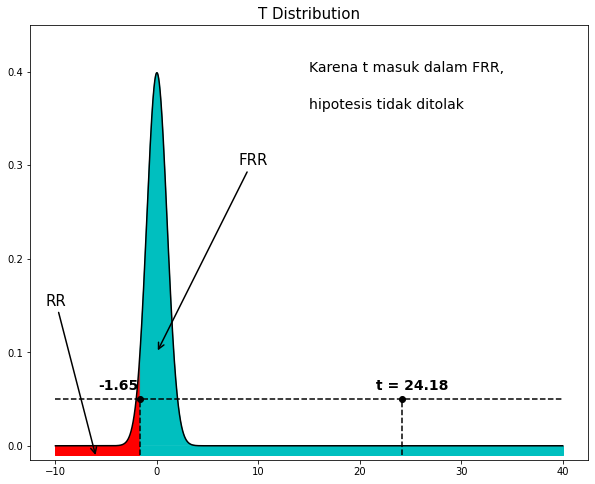

In [17]:
plot_hypothesis_result(t_value, t_value_test, -10, 40, dof)

Karena nilai uji hipotesa t > t(0.05), kita yakin dengan tingkat kepercayaan 95% bahwa nilai rata-rata pendapatan lebih besar dari 35 USD sehingga hipotesis tidak ditolak.

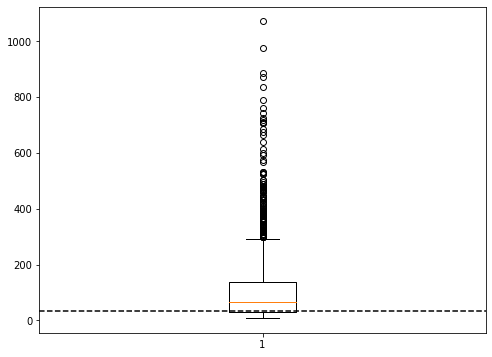

In [18]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset_3['Income'])
left, right = plt.xlim()
plt.plot([left, right], [35, 35], "k--")
plt.show()

<h2>3. Visualisasi Data</h2>
<>

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


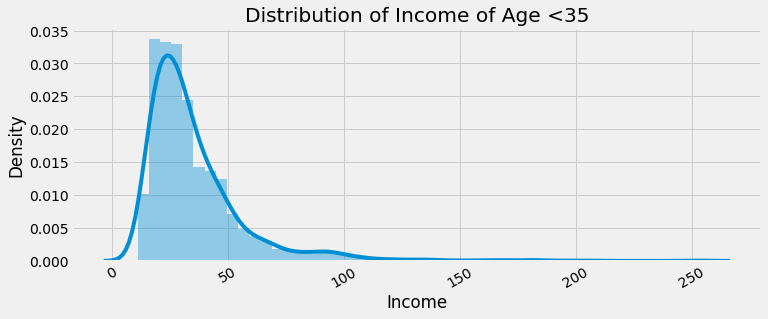

In [21]:
# Diagram Income kategori di bawah 35 tahun
range = dataset_1['Income'].max()*0.05
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(dataset_1['Income'])

plt.title('Distribution of Income of Age <35')
plt.show()

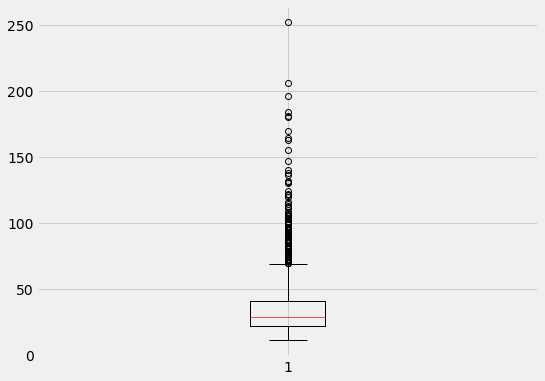

In [22]:
# Boxplot Income kategori  di bawah 35 tahund

plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset_1['Income'])
plt.show()

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


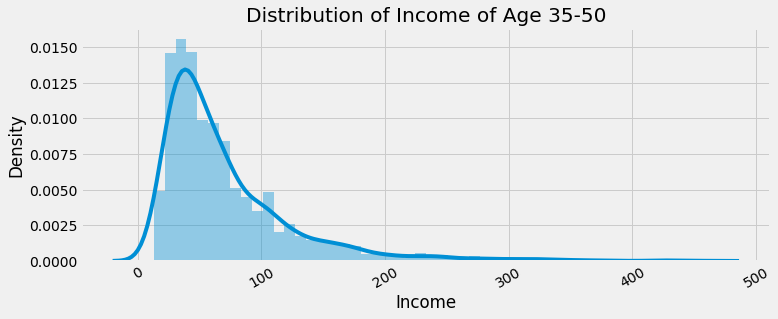

In [23]:
# Diagram Income kategori 35-50 tahun

plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(dataset_2['Income'])
plt.title('Distribution of Income of Age 35-50')
plt.show()

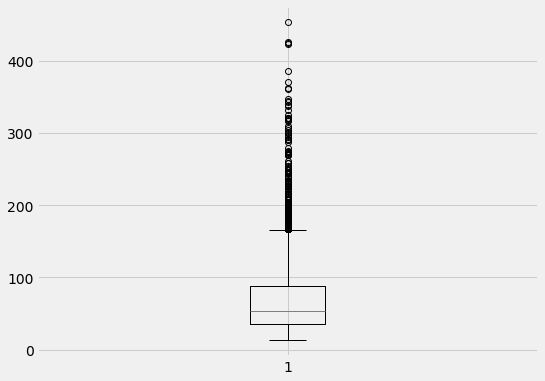

In [24]:
# Boxplot Income kategori 35-50 tahun

plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset_2['Income'])
plt.show()

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


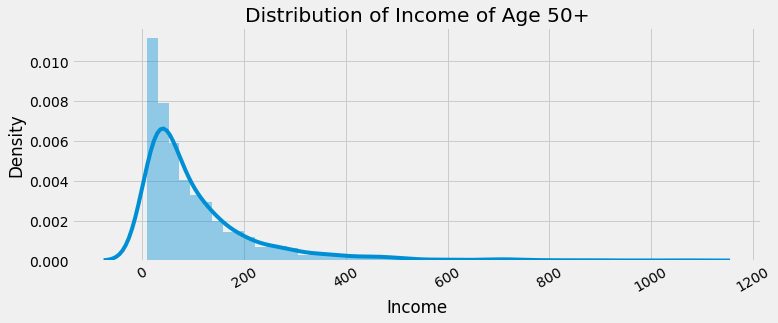

In [25]:
# Diagram Income kategori di atas 50 tahun

plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(dataset_3['Income'])
plt.title('Distribution of Income of Age 50+')
plt.show()

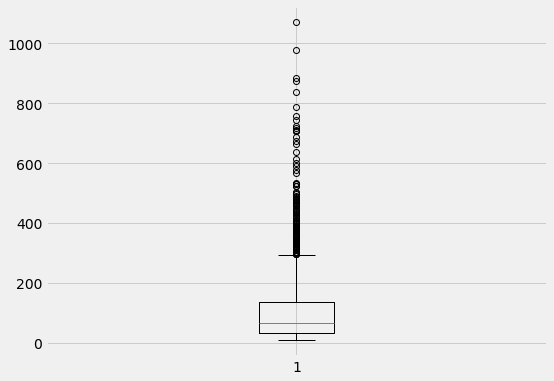

In [26]:
# Boxplot Income kategori di atas 50 tahun

plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset_3['Income'])
plt.show()

<h1> ________________________________________________________________________________________ </h1>
<h2>Pertanyaan Laporan Singkat</h2>
<h3>a. Uji Hipotesis rata-rata </h3>
<p> Buktikan kesahihan/ketidaksahihan secara statiska pendapat bahwa income kelompok 2 adalah 2x lipat rata-rata income kelompok 1 dan rata-rata income kelompok 3 adalah 2x lipat lebih besar dari rata0rata income kelompok 2. </p>
<h3> b. Tingkat keseragaman </h3>
<p> Menentukan tingkat seberangaman secara statiska antara kelompok 1 dan kelompok 3, dan antara kelompol 1 dan 2. Buktikan tingkat keseragaman kelompok 1 dan 2 lebih kecil dari tingkat keseragaman kelompok 1 dan 3. </p>

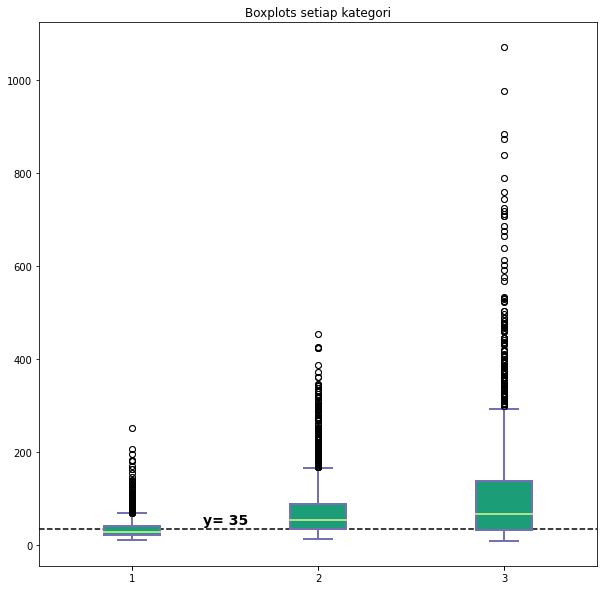

In [19]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt


## combine these different collections into a list    
data_to_plot = [dataset_1['Income'], dataset_2['Income'], dataset_3['Income']]

fig = plt.figure(1, figsize=(10, 10))

ax = fig.add_subplot(111)

bp = ax.boxplot(data_to_plot)
ax.set_title('Boxplots setiap kategori')
ax.set_xticklabels(['Umur < 35 tahun', 'Umur >= 35 tahun dan <=50 tahun', 'Umur > 50 tahun'])
left, right = plt.xlim()
plt.plot([left, right], [35, 35], "k--")
plt.text(1.5, 45, "y= 35", ha="center", fontsize=14, weight="bold")

bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()


In [20]:
def plot_hypothesis_result_2(t_value_1, t_value_2, t_value_test, min_x, max_x, dof):
    x_axis = np.arange(min_x, max_x, 0.001)
    rr = [x for x in x_axis if x <= t_value_1]
    rr2 = [x for x in x_axis if x <= t_value_2]

    plt.figure(figsize=(10, 8))
    plt.ylim(-0.015, 0.45)
    plt.plot(x_axis, t.pdf(x_axis, dof), color="k")
    plt.title("T Distribution", fontsize=15)
    plt.plot([min_x, max_x], [0.05, 0.05], "k--")

    plt.fill_between(x_axis[:len(rr)], t.pdf(x_axis, dof)[:len(rr)], color="red")
    plt.fill_between([min_x, t_value_1], [-0.01, -0.01], color="red")
    plt.annotate("RR", xy=(-6, -0.012), xytext=(-11, 0.15), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([t_value_1, t_value_1], [-0.01, 0.05], "k--")
    plt.plot(t_value_1, 0.05, "ko")
    plt.text(t_value_1-2.1, 0.05*1.2, f"{t_value_1}", ha="center", fontsize=14, weight="bold")

    plt.fill_between(x_axis[len(rr):len(rr2)], t.pdf(x_axis, dof)[len(rr):len(rr2)], color="c0")
    plt.fill_between([t_value, t_value_2], [-0.01, -0.01], color="c0")
    plt.annotate("FRR", xy=(0, 0.1), xytext=(8, 0.3), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([t_value_test, t_value_test], [-0.01, 0.05], "k--")
    plt.plot(t_value_test, 0.05, "ko")
    plt.text(t_value_test+1, 0.05*1.2, f"t = {t_value_test}", ha="center", fontsize=14, weight="bold")

    plt.fill_between(x_axis[len(rr2):], t.pdf(x_axis, dof)[len(rr2):], color="red")
    plt.fill_between([t_value_2, max_x], [-0.01, -0.01], color="red")
    plt.annotate("RR", xy=(12, -0.012), xytext=(25, 0.15), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([t_value_2, t_value_2], [-0.01, 0.05], "k--")
    plt.plot(t_value_2, 0.05, "ko")
    plt.text(t_value_2+2.1, 0.05-0.02, f"{t_value_2}", ha="center", fontsize=14, weight="bold")

    if t_value_1 < t_value_test and t_value_2 > t_value_test :
        plt.text(15, 0.4, "Karena t masuk dalam FRR,", fontsize=14)
        plt.text(15, 0.36, "hipotesis tidak ditolak", fontsize=14)
    else:
        plt.text(15, 0.4, "Karena t masuk dalam RR,", fontsize=14)
        plt.text(15, 0.36, "hipotesis ditolak", fontsize=14)

    plt.show()

In [12]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830 entries, 5 to 6399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2830 non-null   int64  
 1   Income  2830 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 66.3 KB


<h3> Bagian A </h3>
<h4>Uji Hipotesis Rata-rata Kelompok 2 (2x rata-rata kelompok 1) dan rata-rata kelompok 3 (2x rata-rata kelompok 2)</h4>

In [34]:
num_sample = dataset_2['Income'].size
u1 = 2*dataset_1_mean

num_sample_2 = dataset_3['Income'].size
u2 = 2*dataset_2_mean

a = dataset_2_std**2/num_sample
b = (dataset_3_std**2)/num_sample_2

v_up = (a + b)**2
v_down = ((a**2)/(num_sample-1)) + ((b**2)/(num_sample_2-2))
v = v_up/v_down

p = 0.025

t_value_1 = np.round(t.ppf(p, v),2)
print(t_value_1)

t_value_2 = np.round(t.ppf(1-p, v),2)

t_up = (dataset_2_mean - dataset_3_mean) - (u1-u2)
t_down = math.sqrt(a+b)
t_value_test = np.round((t_up/t_down),2)

print("nilai t dengan peluang 0.025 adalah:", "+-", t_value_2)
print("nilai t untuk uji hipotesis rata-rata adalah:", t_value_test)


-1.96
nilai t dengan peluang 0.025 adalah: +- 1.96
nilai t untuk uji hipotesis rata-rata adalah: 9.92


<ipython-input-20-37e2358ed580>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between(x_axis[len(rr):len(rr2)], t.pdf(x_axis, dof)[len(rr):len(rr2)], color="c0")
<ipython-input-20-37e2358ed580>:20: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between([t_value, t_value_2], [-0.01, -0.01], color="c0")


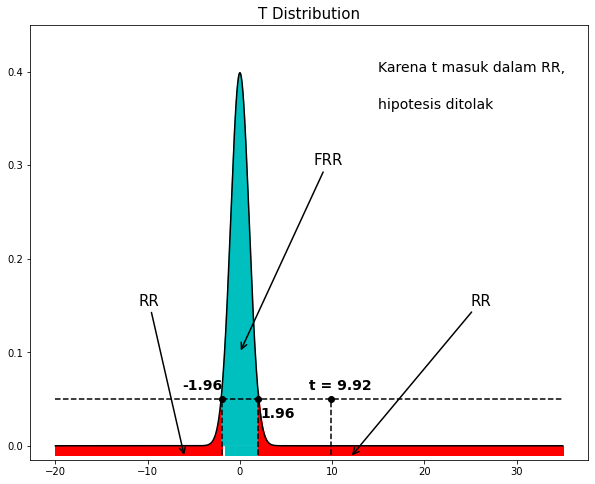

In [22]:
plot_hypothesis_result_2(t_value_1, t_value_2, t_value_test, -20, 35, dof)

Karena nilai uji hipotesis t > t(0.05), kita yakin dengan tingkat kepercayaan 95% bahwa nilai rata-rata pendapatan lebih besar dari 2x rata-rata kelompok 1 sehingga hipotesis tidak ditolak.

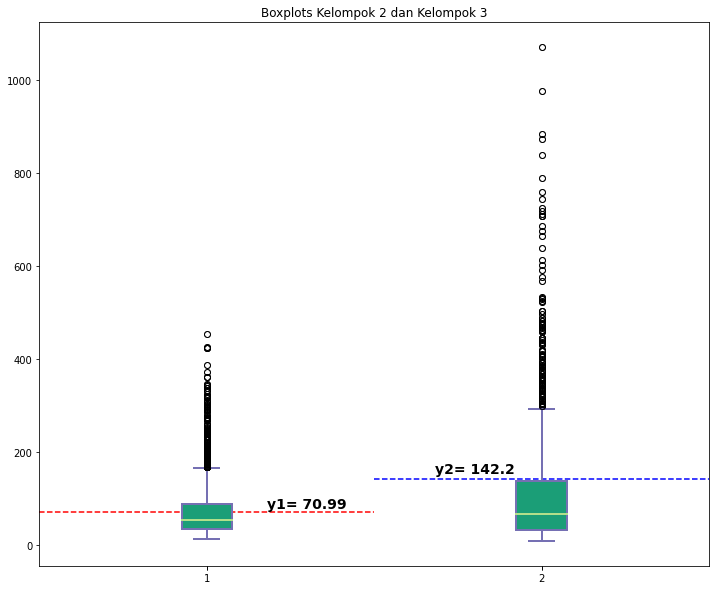

In [23]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt


## combine these different collections into a list    
data_to_plot = [dataset_2['Income'], dataset_3['Income']]

fig = plt.figure(1, figsize=(12, 10))

ax = fig.add_subplot(111)

bp = ax.boxplot(data_to_plot)
ax.set_title('Boxplots Kelompok 2 dan Kelompok 3')
ax.set_xticklabels(['Umur >= 35 tahun dan <=50 tahun', 'Umur > 50 tahun'])
left, right = plt.xlim()
plt.plot([left, right*0.6], [2*dataset_1_mean, 2*dataset_1_mean], "r--")
plt.text(1.3, 2*dataset_1_mean+10, f"y1= {np.round(2*dataset_1_mean,2)}", ha="center", fontsize=14, weight="bold")
plt.plot([1.5, right], [2*dataset_2_mean, 2*dataset_2_mean], "b--")
plt.text(1.8, 2*dataset_2_mean+12, f"y2= {np.round(2*dataset_2_mean,2)}", ha="center", fontsize=14, weight="bold")

bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()


<h3>Bagian B  </h3>

**1. Menguji apakah tingkat keseragaman kelompok 1 sama dengan tingkat keseragaman kelompok 2**


In [29]:
def plot_hypothesis_result_3(f_value_1, f_value_2, f_value_test, min_x, max_x, dfn, dfd):
    x_axis = np.arange(min_x, max_x, 0.001)
    rr = [x for x in x_axis if x <= f_value_1]
    rr2 = [x for x in x_axis if x <= f_value_2]

    plt.figure(figsize=(10, 8))
    plt.ylim(-0.015, 10)
    plt.plot(x_axis, f.pdf(x_axis, dfn=dfn, dfd=dfd), color="k")
    plt.title("F Distribution", fontsize=15)
    plt.plot([min_x, max_x], [2, 2], "k--")

    plt.fill_between(x_axis[:len(rr)], f.pdf(x_axis, dfn=dfn, dfd=dfd)[:len(rr)], color="red")
    plt.fill_between([min_x, f_value_1], [-0.01, -0.01], color="red")
    plt.annotate("RR", xy=(0.91, 0.1), xytext=(0.8, 1), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([f_value_1, f_value_1], [-0.01, 2], "k--")
    plt.plot(f_value_1, 2, "ko")
    plt.text(f_value_1-0.05, 2*1.2, f"{f_value_1}", ha="center", fontsize=14, weight="bold")

    plt.fill_between(x_axis[len(rr):len(rr2)], f.pdf(x_axis, dfn=dfn, dfd=dfd)[len(rr):len(rr2)], color="c0")
    plt.fill_between([f_value, f_value_2], [-0.01, -0.01], color="c0")
    plt.annotate("FRR", xy=(1, 4), xytext=(0.8, 6), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([f_value_test, f_value_test], [-0.01, 2], "k--")
    plt.plot(f_value_test, 2, "ko")
    plt.text(f_value_test, 2*1.2, f"f = {f_value_test}", ha="center", fontsize=14, weight="bold")

    plt.fill_between(x_axis[len(rr2):], f.pdf(x_axis, dfn=dfn, dfd=dfd)[len(rr2):], color="red")
    plt.fill_between([f_value_2, max_x], [-0.01, -0.01], color="red")
    plt.annotate("RR", xy=(1.1, 0.1), xytext=(1.2, 1), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([f_value_2, f_value_2], [-0.01, 2], "k--")
    plt.plot(f_value_2, 2, "ko")
    plt.text(f_value_2+0.05, 2*1.2, f"{f_value_2}", ha="center", fontsize=14, weight="bold")

    if f_value_1 > f_value_test and f_value_2 < f_value_test :
        plt.text(0.1, 8, "Karena f masuk dalam FRR,", fontsize=14)
        plt.text(0.1, 7, "hipotesis h0 tidak ditolak", fontsize=14)
    else:
        plt.text(0.1, 8, "Karena f masuk dalam RR,", fontsize=14)
        plt.text(0.1, 7, "hipotesis h0 ditolak", fontsize=14)

    plt.show()


<ipython-input-29-160e99a622ea>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between(x_axis[len(rr):len(rr2)], f.pdf(x_axis, dfn=dfn, dfd=dfd)[len(rr):len(rr2)], color="c0")
<ipython-input-29-160e99a622ea>:20: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between([f_value, f_value_2], [-0.01, -0.01], color="c0")


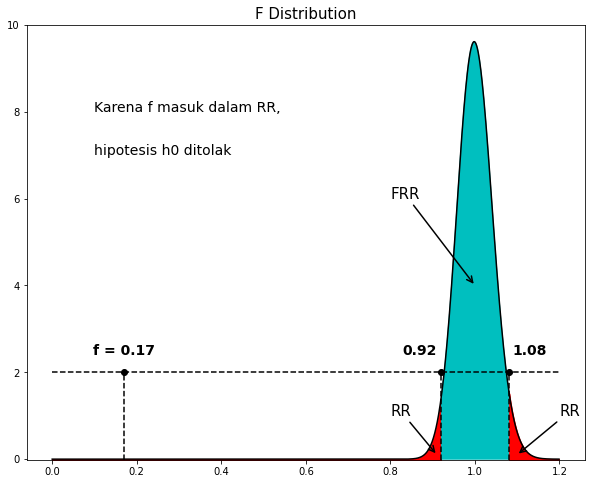

In [30]:
from scipy.stats import f

dfn = dataset_1['Income'].size - 1
dfd = dataset_2['Income'].size - 1

p = 0.025
f_value_1 = np.round(f.ppf(p, dfn=dfn, dfd=dfd),2)
f_value_2 = np.round(f.ppf(1-p, dfn=dfn, dfd=dfd),2)

variance_1 = dataset_1_std**2
variance_2 = dataset_2_std**2

f_value_test = np.round((variance_1/variance_2),2)

plot_hypothesis_result_3(f_value_1, f_value_2, f_value_test, 0, 1.2, dfn, dfd)

**2. Menguji apakah kelompok 1 memiliki signifikansi yang lebih kecil dari tingkat keseragaman kelompok 3**

In [31]:
def plot_hypothesis_result_4(f_value, f_value_test, min_x, max_x, dfn, dfd):
    x_axis = np.arange(min_x, max_x, 0.001)
    rr = [x for x in x_axis if x <= f_value]

    plt.figure(figsize=(10, 8))
    plt.ylim(-0.015, 10)
    plt.plot(x_axis, f.pdf(x_axis, dfn=dfn, dfd=dfd), color="k")
    plt.title("F Distribution", fontsize=15)
    plt.plot([min_x, max_x], [2, 2], "k--")

    plt.fill_between(x_axis[:len(rr)], f.pdf(x_axis, dfn=dfn, dfd=dfd)[:len(rr)], color="c0")
    plt.fill_between([min_x, f_value], [-0.01, -0.01], color="c0")
    plt.annotate("FRR", xy=(1, 4), xytext=(0.8, 6), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([f_value_test, f_value_test], [-0.01, 2], "k--")
    plt.plot(f_value_test, 2, "ko")
    plt.text(f_value_test, 2*1.2, f"f = {f_value_test}", ha="center", fontsize=14, weight="bold")

    plt.fill_between(x_axis[len(rr):], f.pdf(x_axis, dfn=dfn, dfd=dfd)[len(rr):], color="red")
    plt.fill_between([f_value, max_x], [-0.01, -0.01], color="red")
    plt.annotate("RR", xy=(1.1, 0.1), xytext=(1.2, 1), arrowprops=dict(arrowstyle="->", lw=1.5, color="k"), fontsize=15)
    plt.plot([f_value_2, f_value_2], [-0.01, 2], "k--")
    plt.plot(f_value_2, 2, "ko")
    plt.text(f_value_2+0.05, 2*1.2, f"{f_value_2}", ha="center", fontsize=14, weight="bold")

    if f_value_1 > f_value_test:
        plt.text(0.1, 8, "Karena f masuk dalam FRR,", fontsize=14)
        plt.text(0.1, 7, "hipotesis h0 tidak ditolak", fontsize=14)
    else:
        plt.text(0.1, 8, "Karena f masuk dalam RR,", fontsize=14)
        plt.text(0.1, 7, "hipotesis h0 ditolak", fontsize=14)

    plt.show()



<ipython-input-31-67c84ea79fb3>:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between(x_axis[:len(rr)], f.pdf(x_axis, dfn=dfn, dfd=dfd)[:len(rr)], color="c0")
<ipython-input-31-67c84ea79fb3>:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between([min_x, f_value], [-0.01, -0.01], color="c0")


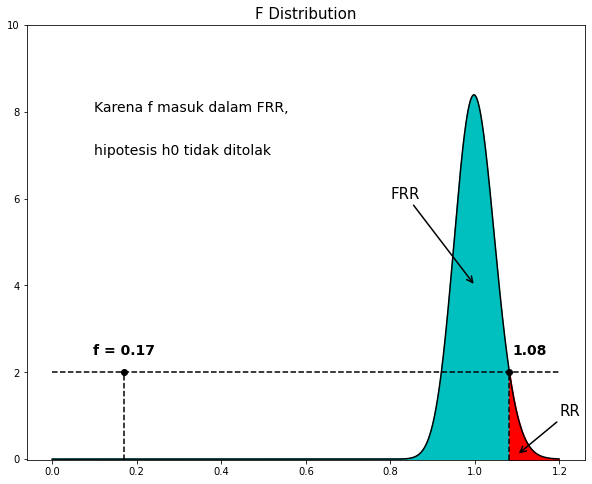

In [32]:
dfn = dataset_1['Income'].size - 1
dfd = dataset_3['Income'].size - 1

p = 0.05
f_value = np.round(f.ppf(1-p, dfn=dfn, dfd=dfd),2)

variance_1 = dataset_1_std**2
variance_2 = dataset_2_std**2

f_value_test = np.round((variance_1/variance_2),2)

plot_hypothesis_result_4(f_value, f_value_test, 0, 1.2, dfn, dfd)

**3. Menguji apakah kelompok 2 memiliki signifikansi yang lebih kecil dari tingkat keseragaman kelompok 3**

<ipython-input-31-67c84ea79fb3>:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between(x_axis[:len(rr)], f.pdf(x_axis, dfn=dfn, dfd=dfd)[:len(rr)], color="c0")
<ipython-input-31-67c84ea79fb3>:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.fill_between([min_x, f_value], [-0.01, -0.01], color="c0")


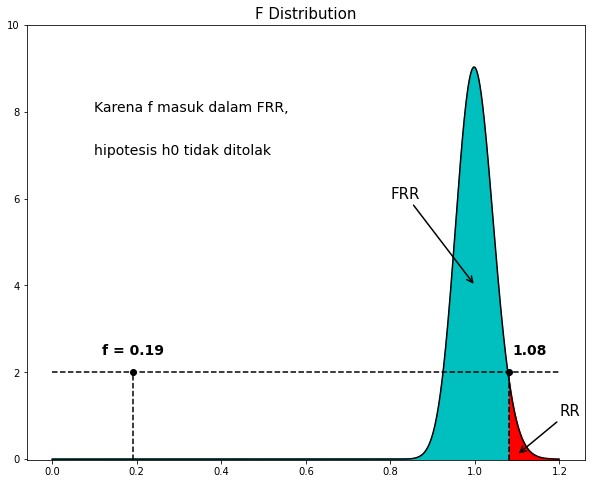

In [33]:
dfn = dataset_2['Income'].size - 1
dfd = dataset_3['Income'].size - 1

p = 0.05
f_value = np.round(f.ppf(1-p, dfn=dfn, dfd=dfd),2)

variance_1 = dataset_2_std**2
variance_2 = dataset_3_std**2

f_value_test = np.round((variance_1/variance_2),2)

plot_hypothesis_result_4(f_value, f_value_test, 0, 1.2, dfn, dfd)